In [1]:
%%capture
!pip install mne
import os
from glob import glob
import numpy as np
import pandas as pd
import mne
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np
import mne
import pandas as pd
import random
import pywt
from pywt import wavedec
#import tensorflow as tf
#import matplotlib.pyplot as plt
#import warnings
#from pathlib import Path
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#from scipy.io import loadmat
#from scipy.signal import butter, lfilter
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
raw = mne.io.read_raw_brainvision("/content/drive/MyDrive/eeg-data-row/session1_sub6_reaching_realMove.vhdr", misc='auto', scale=1.0, preload=True, verbose=None)
events = mne.events_from_annotations(raw)
event_ids = {'Stimulus/S 11': 11,'Stimulus/S 21': 21,'Stimulus/S 31': 31,'Stimulus/S 41': 41,'Stimulus/S 51': 51,'Stimulus/S 61': 61}
epochs = mne.Epochs(raw, events[0], event_id=event_ids, tmin=0, tmax=4, preload=True,baseline=(0, 0))

Extracting parameters from /content/drive/MyDrive/eeg-data-row/session1_sub6_reaching_realMove.vhdr...
Setting channel info structure...
Reading 0 ... 8435599  =      0.000 ...  3374.240 secs...
Used Annotations descriptions: ['Comment/ControlBox is not connected via USB', 'Comment/actiCAP Active Shield On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']
Not setting metadata
300 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 300 events and 10001 original time points ...
0 bad epochs dropped


In [24]:
epochs=epochs.resample(1250.00)

In [64]:
train_epochs = epochs[:270]
test_epochs = epochs[270:]
y_train = train_epochs.events
y_test= test_epochs.events

In [48]:
#prepare tests

In [61]:
def preprocessing(epochs):
    #fmin = 8.05
    #fmax = 64
    #epochs=epochs.filter(fmin, fmax)
    coeffs = wavedec(epochs, 'db4' , level=6)
    coeffs_ = np.array(coeffs[6])
    statCoff= np.log (np.var(coeffs_,axis=1))
    return statCoff

In [62]:
def labels_decoder (events):
    labels = np.empty(shape=(len(events)))
    decode = {11: 0, 21: 1, 31: 2, 41:3, 51: 4, 61: 5, 8 :6}
    k=0
    for i in events :
        labels[k]=decode[i[2]]
        k+=1
    return labels

In [65]:
X_train = preprocessing(train_epochs)
y_train= labels_decoder (y_train)

In [66]:
X_train.shape

(270, 2504)

In [67]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(statCoff, labels, test_size = 0.2,stratify=labels,shuffle=True)

In [68]:
#X_train.shape , X_val.shape , y_train.shape , y_val.shape

In [69]:
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_val)

#print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

SVC(kernel='linear')

In [70]:
x_test = preprocessing(test_epochs)
y_test = labels_decoder (y_test)

In [71]:
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


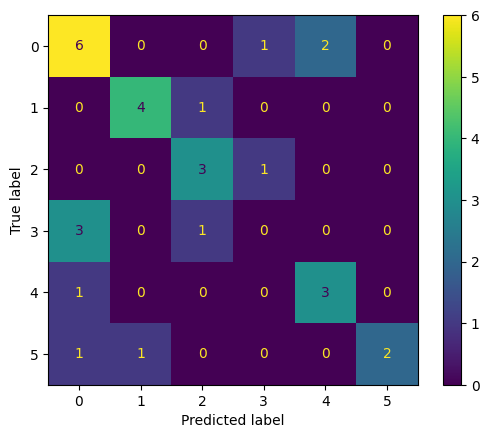

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
